### 간단한 그래픽 및 이벤트 처리

#### 필요한 라이브러리 임포트

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider

### 직선 및 사각형 그리기
<code>cv.line(img,pt1,pt2,color[, thickness[, LineType[, shift]]])</code>: pt1에서 pt2까지 연결하는 직선 그리기<br>
**parameter**  
- pt1: 시작점
- pt2: 끝점
- color: 색상
- thickness: 선 두께
- lineType: cv2.LINE_8(Default),cv2.LINE_4(),cv2.LINE_AA()
- shift: 각 좌표에 대한 비트 이동

<code>cv.rectangle(img,pt1,pt2,color[, thickness[, LineType[, shift]]])</code>: pt1에서 pt2에 의해 정의되는 사각형 그리기<br>
**parameter**  
- pt1: 시작점
- pt2: 끝점
- color: 색상
- thickness: 선 두께
- lineType: cv2.LINE_8(Default),cv2.LINE_4(),cv2.LINE_AA()
- shift: 각 좌표에 대한 비트 이동

<code>cv.clipline(imgRect,pt1,pt2)</code>: pt1에서 pt2까지의 직선이 imgRect 사각형에 의해 절단되는 좌표점을 계산하여 pt1과 pt2를 반환한다. 직선이 사각 영역 밖에 있으면 retval에 False를 반환한다.<br>

#### 배경및 그리기 Method 선언
앞으로 많이 사용할 matplotlib을 활용한 image그리기 및 배경 그리기

In [3]:
def background_img():
    img = np.zeros((512,512,3),dtype=np.int32)+255 # 512 x 512 x 3(Color)의 Backgroud 생성

    cv2.line(img,(0,0),(500,0),(0,0,0),5)
    cv2.line(img,(0,0),(0,500),(0,0,0),5)
    cv2.line(img,(500,0),(500,500),(0,0,0),5)
    cv2.line(img,(0,500),(500,500),(0,0,0),5)
    
    return img

def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

#### 직선 및 사각형 그리기

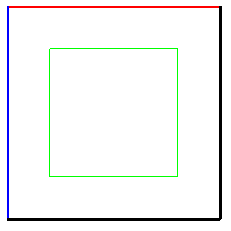

In [4]:
img = np.zeros((512,512,3),dtype=np.int32)+255 # 512 x 512 x 3(Color)의 Backgroud 생성

pt1 = 100,100
pt2 = 400,400
cv2.rectangle(img,pt1,pt2,(0,255,0),2) #img영상에 pt1(100,100), pt2(400,400)의 크기의 녹색(0,255,0), 두께2로서 그린다

cv2.line(img,(0,0),(500,0),(255,0,0),5)
cv2.line(img,(0,0),(0,500),(0,0,255),5)
cv2.line(img,(500,0),(500,500),(0,0,0),5)
cv2.line(img,(0,500),(500,500),(0,0,0),5)

plt.axis('off')
plt.imshow(img)
plt.show()

#### 직선-사각형 교차점 그리기

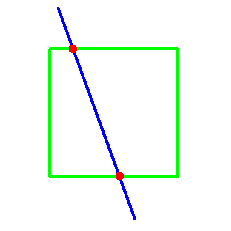

In [5]:
img = np.zeros((512,512,3),dtype=np.int32)+255 # 512 x 512 x 3(Color)의 Backgroud 생성

x1,x2 = 100,400
y1,y2 = 100,400
cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),5)

pt1 = 120,5
pt2 = 300,500

cv2.line(img,pt1,pt2,(0,0,255),5)

imgRect = (x1,y1,x2-x1,y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect,pt1,pt2)

if retval:
    cv2.circle(img,rpt1,radius=10,color=(255,0,0),thickness=-1)
    cv2.circle(img,rpt2,radius=10,color=(255,0,0),thickness=-1)
    
plot(img)

### 원 및 타원 그리기
<code>cv.circle(img,center,radius,color[, thickness[, LineType[, shift]]])</code>: 원 그리기<br>
**parameter**  
- center: 중심점
- radius: 반지름
- color: 색상
- thickness: 선 두께 (-1일시 안의 색상 채움)

<code>cv.ellipse(img,center,axes,angle,startAngle,endAngle,color[, thickness[, LineType[, shift]]])</code>: 타원 그리기<br>
**parameter**  
- center: 중심점
- axes: 주축의 크기의 절반
- angle: 회전각도
- startAngle: 호의 시작 각도
- endAngle: 호의 끝 각도

<code>cv.ellipse(img,box,color[, thickness[, LineType]])</code>: 회전 사각형 내접 타원<br>
**parameter**  
- box: (center,size,angle) 회전 사각형

<code>cv.ellipse2Poly(center,axes,angle,arcStart,arcEnd,delta)</code>: 타원 위 좌표 계산<br>
**parameter**  
- center: 중심점
- axes: 주축의 크기의 절반
- angle: 회전각도
- arcStart: 호의 시작 각도
- arcEnd: 호의 끝 각도
- delta: 각도 간격

#### 원 그리기

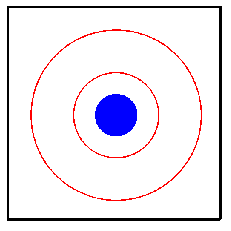

In [6]:
img = background_img()

cx = img.shape[0]//2
cy = img.shape[1]//2

for r in range(200,0,-100):
    cv2.circle(img,(cx,cy),r,color=(255,0,0), thickness=2)
    
cv2.circle(img,(cx,cy),radius=50,color=(0,0,255),thickness=-1)

plot(img)

#### 타원 그리기

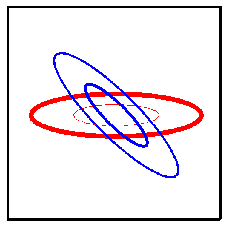

In [7]:
img = background_img()

ptCenter = img.shape[0]//2, img.shape[1]//2
size = 200,50

# 중심, 축 절반 크기(가로, 세로), 각도, 시작각도, 끝각도, 색상, 선 두께
cv2.ellipse(img,ptCenter,size,0,0,360,(255,0,0),10)
cv2.ellipse(img,ptCenter,size,45,0,360,(0,0,255),3)

box = (ptCenter,size,0)
cv2.ellipse(img,box,(255,0,0),0,4)

box = (ptCenter,size,45)
cv2.ellipse(img,box,(0,0,255),5,6)

plot(img)

### 다각형 그리기
<code>cv.polylines(img,pts,isClosed,color[, thickness[, LineType[, shift]]])</code>: 다각형 그리기<br>
**parameter**  
- pts: 좌표(다각형들의 numpy 배열)
- isClosed: if True=> 닫힌 사각형 

<code>cv.fillConvexPoly(img,points,color[, thickness[, LineType[, shift]]])</code>: 볼록 다각형 채우기<br>
**parameter**  
- points: 좌표(다각형들의 numpy 배열)
- color: 다각형을 채울 색깔

<code>cv.fillPoly(img,pts,color[, thickness[, LineType[, offset]]])</code>: 다각형 채우기<br>
**parameter**  
- pts: 좌표(다각형들의 numpy 배열)


#### 다각형 그리기

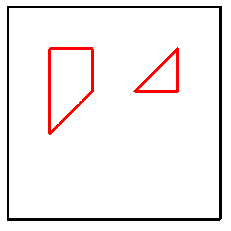

In [8]:
img = background_img()

pts1 = np.array([[100,100],[200,100],[200,200],[100,300],[100,200]])
pts2 = np.array([[300,200],[400,100],[400,200]])

cv2.polylines(img,[pts1,pts2], isClosed = True, color = (255,0,0),thickness=5)

plot(img)

#### 다각형 그리기 2

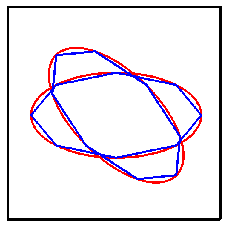

In [9]:
img = background_img()

ptCenter = img.shape[0]//2, img.shape[1]//2
size = 200,100

cv2.ellipse(img,ptCenter,size,0,0,360,(255,0,0),3)
pts1 = cv2.ellipse2Poly(ptCenter,size,0,0,360,delta=45)

cv2.ellipse(img,ptCenter,size,45,0,360,(255,0,0),3)
pts2 = cv2.ellipse2Poly(ptCenter,size,45,0,360,delta=45)

cv2.polylines(img,[pts1,pts2], isClosed=True, color=(0,0,255), thickness=3)

plot(img)

#### 회전 사각형

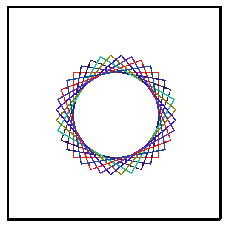

In [10]:
img = background_img()

x,y = 256,256
size = 200

for angle in range(0,90,10):
    rect = ((256,256),(size,size),angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    r=np.random.randint(256)
    g=np.random.randint(256)
    b=np.random.randint(256)
    cv2.polylines(img,[box],True,(r,g,b),2)

plot(img)

#### 다각형 채우기

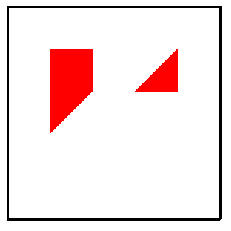

In [13]:
img = background_img()

pts1 = np.array([[100,100],[200,100],[200,200],[100,300],[100,200]])
pts2 = np.array([[300,200],[400,100],[400,200]])

cv2.fillPoly(img,[pts1,pts2], color = (255,0,0))

plot(img)

### 문자열 출력
<code>cv.getTextSize(text,fontFace,fontScale,thickness)</code>: 문자열 출력 크기 변환<br>
**parameter**  
- text: 출력할 문자
- fontFace: 문자 Style, ex)cv2.FONT_HERSHEY_PLAIN
- fontScale: 문자 크기
- thickness: 문자 두께

<code>cv.putText(img,text,org,fontFace,fontScale,color[, thickness[, LineType[, bottonLeftOrigin]]])</code>: 타원 그리기<br>
**parameter**  
- org: 사각형 왼쪽 아래 좌표 위치

#### 문자열 출력

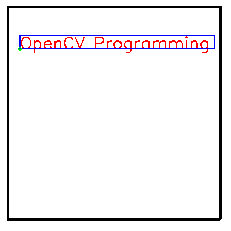

In [15]:
img = background_img()

text = 'OpenCV Programming'
org = (30,100)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,text,org,font,1.3,(255,0,0),2)

size,baseLine = cv2.getTextSize(text,font,1.3,10)
cv2.rectangle(img,org,(org[0]+size[0],org[1]-size[1]),(0,0,255),2)
cv2.circle(img,org,3,(0,255,0),2)

plot(img)

### 마우스 이벤트 처리

이전 Post <a href="https://wjddyd66.github.io/opencv/2019/10/22/OpenCV(1).html">OpenCV-영상 및 비디오 입출력</a>에서 사전사항으로 적어두었던 ipywidgets를 활용하여 OpenCV같은 기능을 넣었다.  

Widgets은 Java에서의 Swing과 같은 개념으로서 작동한다.  
기본적으로 2가지의 구성요소로 widgets이 생성된다고 생각한다.  

**Component**: Widgets을 구성하는 구성요소 이다.
- box: 전체 Component를 포함할 하나의 Component (Box)
- button1: Up Button Component (Button)
- button2: Down Button Component (Button)
- button3: Left Button Component (Button)
- button4: Right Button Component (Button)
- wImg: 출력 결과를 보여줄 Component (Image)

**Event**: 각각의 Component에 대한 Event를 정의할 수 있다.
- up_button_clicked: button1 Component Click시 y축 위로 이동
- down_button_clicked: button2 Component Click시 y축 아래로 이동
- left_button_clicked: button3 Component Click시 x축 왼쪽으로 이동
- right_button_clicked: button4 Component Click시 x축 오른쪽으로 이동



**참고 사이트**  
Component 설명: <a href="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html">정식 사이트</a><br>
Event 설명: <a href="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html">정식 사이트</a><br>

In [16]:
button1 = Button(description="Up")
button2 = Button(description="Down")
button3 = Button(description="Left")
button4 = Button(description="Right")

wImg = Image(layout = Layout(border="solid"), width="50%") 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

items = [button1,button2,button3,button4]

box = Box(children=items)

display.display(box, wImg)

width, height = 512,512
x,y,R = 256,256,50

def up_button_clicked(b):
    global y,R
    
    if y - 10 > R:
        y = y-10
    else:
        y = R
    draw_some()
    
def down_button_clicked(b):
    global y,R,height
    
    if y + R < height:
        y += 10
    else:
        y = height - R
    draw_some()

def left_button_clicked(b):
    global x,R
    if x - 10 > R:
        x -= 10
    else:
        x = R
    draw_some()
    
def right_button_clicked(b):
    global x,R,width
    
    if x + R < width:
        x += 10
    else:
        x = width - R
    draw_some()
    
def draw_some():
    global x,y,R
    img = np.zeros((512,512,3),dtype=np.int32)+255
    cv2.circle(img,(x,y),R,(0,0,255),-1)
        
    tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
    wImg.value = tmpStream
    
draw_some()


button1.on_click(up_button_clicked)
button2.on_click(down_button_clicked)
button3.on_click(left_button_clicked)
button4.on_click(right_button_clicked)

Box(children=(Button(description='Up', style=ButtonStyle()), Button(description='Down', style=ButtonStyle()), …

Image(value=b'', layout="Layout(border='solid')", width='50%')

### 트랙바 이벤트 처리

**Component**: Widgets을 구성하는 구성요소 이다.
- box: 전체 Component를 포함할 하나의 Component (Box)
- IntSlider_Red: Image R 값 정의 Component (IntSlider=트랙바)
- IntSlider_Green: Image G 값 정의 Component (IntSlider=트랙바)
- IntSlider_Blue: Image B 값 정의 Component (IntSlider=트랙바)
- wImg: 출력 결과를 보여줄 Component (Image)

**Event**: 각각의 Component에 대한 Event를 정의할 수 있다.
- on_value_change_red: Image RGB값 중 R값 정의
- on_value_change_green: Image RGB값 중 G값 정의
- on_value_change_blue: Image RGB값 중 B값 정의


In [17]:
IntSlider_Red = IntSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Red: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Green = IntSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Green: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Blue = IntSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Blue: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

wImg = Image(layout = Layout(border="solid"), width="50%") 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

items = [IntSlider_Red,IntSlider_Green,IntSlider_Blue]

box = Box(children=items)

display.display(box, wImg)

def draw_some():
    global b,g,r
    img = np.zeros((512,512,3),dtype=np.int)
    img[:] = (b,g,r)
    tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
    wImg.value = tmpStream

    
b,g,r = 0,0,0
draw_some()

def on_value_change_red(change):
    global r
    r = change['new']
    draw_some()
    
def on_value_change_blue(change):
    global g
    g = change['new']
    draw_some()
    
def on_value_change_green(change):
    global b
    b = change['new']
    draw_some()

IntSlider_Red.observe(on_value_change_red, names='value')
IntSlider_Green.observe(on_value_change_blue, names='value')
IntSlider_Blue.observe(on_value_change_green, names='value')

Box(children=(IntSlider(value=0, continuous_update=False, description='Red: ', max=255), IntSlider(value=0, co…

Image(value=b'', layout="Layout(border='solid')", width='50%')